<a href="https://colab.research.google.com/github/Anjasfedo/Code-as-a-Cryptography/blob/main/ecc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluate ECC

In [ ]:
!pip install eciespy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.6 MB/s eta 0:00:00


In [ ]:
import time
import hashlib
import math
from ecies.utils import generate_eth_key
from ecies import encrypt, decrypt

# Function to calculate the avalanche effect by comparing two hashes
def avalanche_effect(message1, message2):
    hash1 = hashlib.sha256(message1.encode()).hexdigest()
    hash2 = hashlib.sha256(message2.encode()).hexdigest()

    # Compare bit differences
    bit_difference = sum(bin(int(h1, 16) ^ int(h2, 16)).count('1') for h1, h2 in zip(hash1, hash2))
    total_bits = len(hash1) * 4  # Each hex character is 4 bits
    return (bit_difference / total_bits) * 100  # Percentage of differing bits

# Function to evaluate encryption and decryption timing
def evaluate_algorithm(public_key_hex, private_key_hex, content):
    try:
        # Timing the encryption process
        start_time = time.time()
        ciphertext = encrypt(public_key_hex, content.encode())
        encryption_time = time.time() - start_time
        print(f"Ciphertext: {ciphertext.hex()}")
        print(f"Encryption Time: {encryption_time:.6f} seconds")

        # Timing the decryption process
        start_time = time.time()
        decrypted_message = decrypt(private_key_hex, ciphertext)
        decryption_time = time.time() - start_time
        print(f"Decrypted Message: {decrypted_message.decode()}")
        print(f"Decryption Time: {decryption_time:.6f} seconds")

        # Check if the decryption is correct
        if decrypted_message.decode() == content:
            print("Decryption successful: Message matches original content.")
        else:
            print("Decryption failed: Message does not match original content.")

    except Exception as e:
        print(f"Error during encryption/decryption: {e}")

    return ciphertext

# Key Strength Evaluation (Binary Distribution of Key)
def key_strength_analysis(key_hex):
    key_bin = bin(int(key_hex, 16))[2:]  # Convert the key from hex to binary
    bit_count = len(key_bin)

    ones = key_bin.count('1')
    zeros = bit_count - ones

    print(f"Key Strength Analysis:")
    print(f"Total Bits: {bit_count}")
    print(f"1's Count: {ones} ({(ones / bit_count) * 100:.2f}%)")
    print(f"0's Count: {zeros} ({(zeros / bit_count) * 100:.2f}%)\n")

# Entropy Calculation for Ciphertext
def calculate_entropy(data):
    """Calculate Shannon entropy of the data."""
    data_bytes = data
    frequency = {}
    for byte in data_bytes:
        frequency[byte] = frequency.get(byte, 0) + 1

    entropy = 0
    data_length = len(data_bytes)
    for freq in frequency.values():
        probability = freq / data_length
        entropy -= probability * math.log2(probability)

    return entropy

# Use the provided content for encryption
CONTENT = "3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup"

# Generate keys
private_key = generate_eth_key()
public_key = private_key.public_key

public_key_hex = public_key.to_hex()
private_key_hex = private_key.to_hex()

print("Public Key:", public_key_hex)
print("Private Key:", private_key_hex)

# Evaluate algorithm performance and correctness
ciphertext = evaluate_algorithm(public_key_hex, private_key_hex, CONTENT)

# Key Strength Analysis (Binary Distribution of Key)
key_strength_analysis(public_key_hex)

# Testing entropy of ciphertext
ciphertext_entropy = calculate_entropy(ciphertext)
print(f"Entropy of Ciphertext: {ciphertext_entropy:.2f} bits")

# Testing avalanche effect
# Slightly change the content (change one character or bit)
modified_content = "3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup!"
print(f"\nOriginal Message: {CONTENT}")
print(f"Modified Message: {modified_content}")

avalanche_percentage = avalanche_effect(CONTENT, modified_content)
print(f"Avalanche Effect: {avalanche_percentage:.2f}% bit difference between original and modified message")


Public Key: 0x9ff522bff3f7f9772fe7b3af20a8a73d942856d7cf23bf347988828942a95d9eae9a2068c3bdde9402da1aec58eb6cbed8861f5c95f7f8f9dda04bac80322d8f
Private Key: 0x9af5c9cafe52819188693b3f8ecbcb0f1d6f16ed49329cac3d391f46bd37e179
Ciphertext: 04708948c195a58938be99f3f67cd3591b0592316e865c6111c144d56bea695c2e6630072a106e7cd9ea06289c0914524d6963cd119923703f4cf95d6075e1db67bddb61708e1ac99f5d40b4e05d8166ba60c3de836ba2246d8051cb1fdf6e5ea545ac62c7fe5a46813821f9c2b1c24c651202657037ab14fd2f8033976ff6c1afaeb85b5d4e6d588a699889423c42402fca6520bfa226b9ca7224cd2bb694399dad6523560f79dd58c04272eef4b0c7cccd123d28046bd1ee7e9828570dd53ed3133520701f7d0876d9696040a8c508760e698338e7dc0d7c907d0e301942aa468d165e933fecbcf771698352e4b6c1d42a3fea99eeb34e45e7f96d27d3a9b1ad7d69be4a0129153969825b8eb2be82f50e
Encryption Time: 0.000957 seconds
Decrypted Message: 3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wn

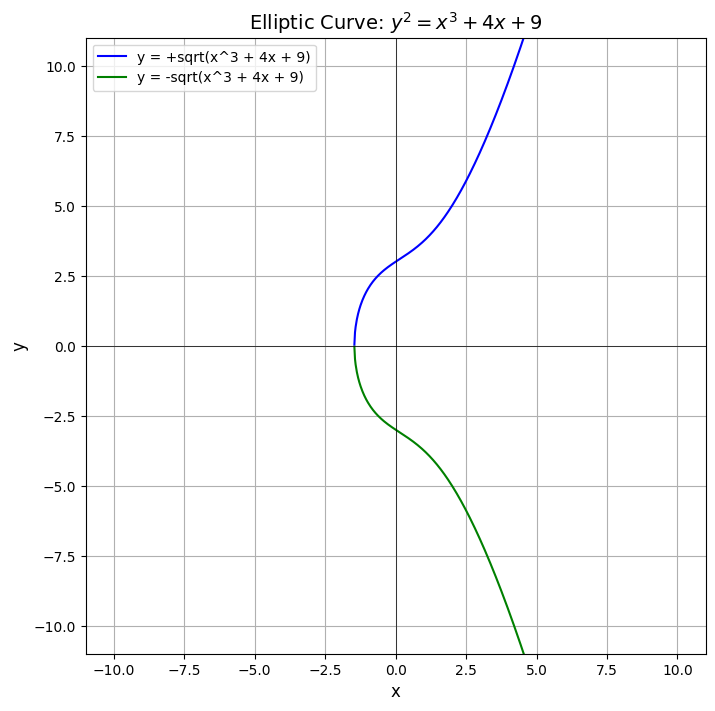

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients for the elliptic curve equation y^2 = x^3 + ax + b
a = 4
b = 9

# Function to calculate the right-hand side of the elliptic curve equation
def elliptic_curve(x, a, b):
    return x**3 + a*x + b

# Generate a denser set of x values to make the curve smoother
x = np.linspace(-11, 11, 1000)

# Calculate y^2 values from the elliptic curve equation y^2 = x^3 + ax + b
y_squared = elliptic_curve(x, a, b)

# Mask values where y^2 is negative, as sqrt can't be applied to negative numbers in real numbers
valid_mask = y_squared >= 0
y_squared_valid = y_squared[valid_mask]
x_valid = x[valid_mask]

# Calculate y values (positive and negative branches) from valid y^2 values
y_positive = np.sqrt(y_squared_valid)
y_negative = -np.sqrt(y_squared_valid)

# Plot the elliptic curve
plt.figure(figsize=(8, 8))
plt.plot(x_valid, y_positive, label="y = +sqrt(x^3 + 4x + 9)", color='blue')
plt.plot(x_valid, y_negative, label="y = -sqrt(x^3 + 4x + 9)", color='green')

# Add labels, title, and legend
plt.title(r'Elliptic Curve: $y^2 = x^3 + 4x + 9$', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Add grid and set limits for better visualization of the negative x-axis
plt.grid(True)
plt.xlim(-11, 11)
plt.ylim(-11, 11)
plt.legend()

# Show the plot
plt.show()

In [ ]:
class EllipticCurve:
    def __init__(self, a, b, p):
        self.a = a  # Coefficient 'a' in the elliptic curve equation
        self.b = b  # Coefficient 'b' in the elliptic curve equation
        self.p = p  # Prime number for the finite field (mod p)

    def inverse_mod(self, x, p):
        """Returns the modular inverse of x modulo p, i.e., (1/x) % p."""
        return pow(x, p - 2, p)

    def point_addition(self, P, Q):
        """Adds two points P and Q on the elliptic curve."""
        if P == Q:
            raise ValueError("This method is for point addition, not point doubling.")

        Px, Py = P
        Qx, Qy = Q

        # Ensure points are not the same
        if Px == Qx and Py == Qy:
            raise ValueError("Point doubling needs a separate function.")

        # Calculate the slope (lambda) as (Qy - Py) / (Qx - Px)
        slope = (Qy - Py) * self.inverse_mod(Qx - Px, self.p) % self.p

        # Calculate Rx using the point addition formula
        Rx = (slope ** 2 - Px - Qx) % self.p

        # Calculate Ry using the point addition formula
        Ry = (slope * (Px - Rx) - Py) % self.p

        # Return the resulting point R = (Rx, Ry)
        return (Rx, Ry)

# Example elliptic curve parameters and points for Google Colab

# Elliptic curve: y^2 = x^3 + ax + b over a finite field Fp
a = 2  # coefficient 'a'
b = 3  # coefficient 'b'
p = 97 # prime number (mod p for finite field)

# Create the elliptic curve object
curve = EllipticCurve(a, b, p)

# Define two points P and Q on the elliptic curve
P = (3, 6)
Q = (10, 20)

# Perform point addition on P and Q
R = curve.point_addition(P, Q)

# Display the result
R


(88, 18)

In [ ]:
class EllipticCurve:
    def __init__(self, a, b, p):
        self.a = a  # Coefficient 'a' in the elliptic curve equation
        self.b = b  # Coefficient 'b' in the elliptic curve equation
        self.p = p  # Prime number for the finite field (mod p)

    def inverse_mod(self, x, p):
        """Returns the modular inverse of x modulo p, i.e., (1/x) % p."""
        return pow(x, p - 2, p)

    def point_addition(self, P, Q):
        """Adds two points P and Q on the elliptic curve."""
        if P == Q:
            raise ValueError("This method is for point addition, not point doubling.")

        Px, Py = P
        Qx, Qy = Q

        # Ensure points are not the same
        if Px == Qx and Py == Qy:
            raise ValueError("Point doubling needs a separate function.")

        # Calculate the slope (lambda) as (Qy - Py) / (Qx - Px)
        slope = (Qy - Py) * self.inverse_mod(Qx - Px, self.p) % self.p

        # Calculate Rx using the point addition formula
        Rx = (slope ** 2 - Px - Qx) % self.p

        # Calculate Ry using the point addition formula
        Ry = (slope * (Px - Rx) - Py) % self.p

        # Return the resulting point R = (Rx, Ry)
        return (Rx, Ry)

    def point_doubling(self, P):
        """Doubles a point P on the elliptic curve."""
        Px, Py = P

        # Slope (lambda) for point doubling
        slope = (3 * Px**2 + self.a) * self.inverse_mod(2 * Py, self.p) % self.p

        # Calculate Rx using the point doubling formula
        Rx = (slope ** 2 - 2 * Px) % self.p

        # Calculate Ry using the point doubling formula
        Ry = (slope * (Px - Rx) - Py) % self.p

        # Return the resulting point R = (Rx, Ry)
        return (Rx, Ry)

    def point_negation(self, P):
        """Returns the negation of a point P(x, y) -> -P(x, -y)."""
        Px, Py = P
        return (Px, -Py % self.p)

    def point_subtraction(self, P, Q):
        """Subtracts point Q from P on the elliptic curve using P - Q = P + (-Q)."""
        neg_Q = self.point_negation(Q)
        return self.point_addition(P, neg_Q)

    def point_multiplication(self, k, P):
        """Multiplies a point P by an integer k using repeated point addition."""
        result = None
        addend = P

        while k:
            if k & 1:
                if result is None:
                    result = addend
                else:
                    result = self.point_addition(result, addend)

            # Point doubling
            addend = self.point_doubling(addend)

            # Move to the next bit
            k >>= 1

        return result


# Example elliptic curve parameters and points for Google Colab

# Elliptic curve: y^2 = x^3 + ax + b over a finite field Fp
a = 2  # coefficient 'a'
b = 3  # coefficient 'b'
p = 97 # prime number (mod p for finite field)

# Create the elliptic curve object
curve = EllipticCurve(a, b, p)

# Define two points P and Q on the elliptic curve
P = (3, 6)
Q = (10, 20)

# Perform point addition
R_add = curve.point_addition(P, Q)

# Perform point doubling
R_double = curve.point_doubling(P)

# Perform point subtraction
R_subtract = curve.point_subtraction(P, Q)

# Perform point multiplication (e.g., 5 * P)
R_multiplication = curve.point_multiplication(5, P)

# Display the results
R_add, R_double, R_subtract, R_multiplication


((88, 18), (80, 10), (78, 37), (91, 91))

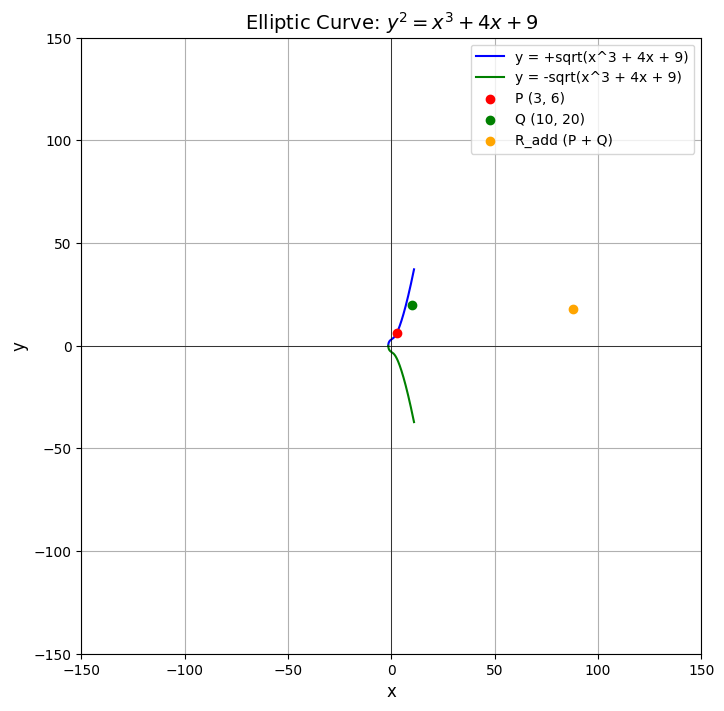

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the elliptic curve equation y^2 = x^3 + ax + b
def elliptic_curve(x, a, b):
    return x**3 + a*x + b

# Class for elliptic curve operations, including point addition
class EllipticCurve:
    def __init__(self, a, b, p):
        self.a = a  # Coefficient 'a' in the elliptic curve equation
        self.b = b  # Coefficient 'b' in the elliptic curve equation
        self.p = p  # Prime number for the finite field (mod p)

    def inverse_mod(self, x, p):
        """Returns the modular inverse of x modulo p."""
        return pow(x, p - 2, p)

    def point_addition(self, P, Q):
        """Adds two points P and Q on the elliptic curve."""
        Px, Py = P
        Qx, Qy = Q

        # Calculate the slope (lambda) as (Qy - Py) / (Qx - Px)
        slope = (Qy - Py) * self.inverse_mod(Qx - Px, self.p) % self.p

        # Calculate Rx using the point addition formula
        Rx = (slope ** 2 - Px - Qx) % self.p

        # Calculate Ry using the point addition formula
        Ry = (slope * (Px - Rx) - Py) % self.p

        # Return the resulting point R = (Rx, Ry)
        return (Rx, Ry)

# Coefficients for the elliptic curve equation y^2 = x^3 + ax + b
a = 4
b = 9
p = 97  # Modulo prime for field

# Create the elliptic curve object
curve = EllipticCurve(a, b, p)

# Define two points P and Q on the elliptic curve
P = (3, 6)
Q = (10, 20)

# Perform point addition
R_add = curve.point_addition(P, Q)

# Generate a denser set of x values to make the curve smoother
x = np.linspace(-11, 11, 1000)

# Calculate y^2 values from the elliptic curve equation y^2 = x^3 + ax + b
y_squared = elliptic_curve(x, a, b)

# Mask values where y^2 is negative, as sqrt can't be applied to negative numbers in real numbers
valid_mask = y_squared >= 0
y_squared_valid = y_squared[valid_mask]
x_valid = x[valid_mask]

# Calculate y values (positive and negative branches) from valid y^2 values
y_positive = np.sqrt(y_squared_valid)
y_negative = -np.sqrt(y_squared_valid)

# Plot the elliptic curve
plt.figure(figsize=(8, 8))
plt.plot(x_valid, y_positive, label="y = +sqrt(x^3 + 4x + 9)", color='blue')
plt.plot(x_valid, y_negative, label="y = -sqrt(x^3 + 4x + 9)", color='green')

# Plot points P, Q, and R_add
plt.scatter(*P, color="red", label="P (3, 6)", zorder=5)
plt.scatter(*Q, color="green", label="Q (10, 20)", zorder=5)
plt.scatter(*R_add, color="orange", label="R_add (P + Q)", zorder=5)

# Add labels, title, and legend
plt.title(r'Elliptic Curve: $y^2 = x^3 + 4x + 9$', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Add grid and set limits for better visualization of the negative x-axis
plt.grid(True)
plt.xlim(-150, 150)
plt.ylim(-150, 150)
plt.legend()

# Show the plot
plt.show()


In [ ]:
def is_valid_elliptic_curve(a, b, p):
    """Check if the elliptic curve y^2 = x^3 + ax + b is non-singular mod p."""
    discriminant = (4 * a**3 + 27 * b**2) % p
    return discriminant != 0

# Example values
a = 2
b = 3
p = 97  # A prime number for the finite field

# Check if the curve is valid
if is_valid_elliptic_curve(a, b, p):
    print(f"The elliptic curve y^2 = x^3 + {a}x + {b} is non-singular mod {p}.")
else:
    print(f"The elliptic curve y^2 = x^3 + {a}x + {b} is singular mod {p}.")


The elliptic curve y^2 = x^3 + 2x + 3 is non-singular mod 97.


In [ ]:
def elliptic_curve(x, a, b):
    return x**3 + a*x + b

In [ ]:
def point_addition(P, Q, p):
    """
    Adds two points P and Q on an elliptic curve over a finite field of prime p.

    P = (Px, Py), Q = (Qx, Qy)
    p is the prime number for the finite field (mod p).
    """
    Px, Py = P
    Qx, Qy = Q

    # Ensure that the points are not identical
    if Px == Qx and Py == Qy:
        raise ValueError("Use point doubling when P == Q")

    # Compute the slope (lambda) as (Qy - Py) / (Qx - Px) mod p
    slope = ((Qy - Py) * pow(Qx - Px, p - 2, p)) % p  # Using modular inverse

    # Compute Rx
    Rx = (slope**2 - Px - Qx) % p

    # Compute Ry
    Ry = (slope * (Px - Rx) - Py) % p

    return (Rx, Ry)

# Example points P and Q on the curve
P = (3, 6)
Q = (10, 20)
p = 97  # Prime modulus for the finite field

# Perform point addition
R_add = point_addition(P, Q, p)
print(f"R_add = P + Q = {R_add}")


R_add = P + Q = (88, 18)


# Equation to Code

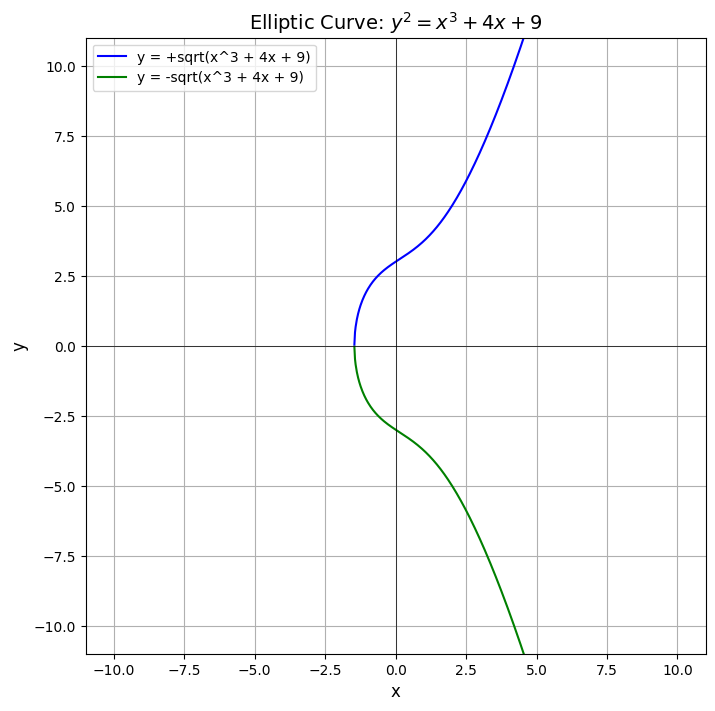

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients for the elliptic curve equation y^2 = x^3 + ax + b
a = 4
b = 9

# Function to calculate the right-hand side of the elliptic curve equation
def elliptic_curve(x, a, b):
    return x**3 + a*x + b

# Generate a denser set of x values to make the curve smoother
x = np.linspace(-11, 11, 1000)

# Calculate y^2 values from the elliptic curve equation y^2 = x^3 + ax + b
y_squared = elliptic_curve(x, a, b)

# Mask values where y^2 is negative, as sqrt can't be applied to negative numbers in real numbers
valid_mask = y_squared >= 0
y_squared_valid = y_squared[valid_mask]
x_valid = x[valid_mask]

# Calculate y values (positive and negative branches) from valid y^2 values
y_positive = np.sqrt(y_squared_valid)
y_negative = -np.sqrt(y_squared_valid)

# Plot the elliptic curve
plt.figure(figsize=(8, 8))
plt.plot(x_valid, y_positive, label="y = +sqrt(x^3 + 4x + 9)", color='blue')
plt.plot(x_valid, y_negative, label="y = -sqrt(x^3 + 4x + 9)", color='green')

# Add labels, title, and legend
plt.title(r'Elliptic Curve: $y^2 = x^3 + 4x + 9$', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Add grid and set limits for better visualization of the negative x-axis
plt.grid(True)
plt.xlim(-11, 11)
plt.ylim(-11, 11)
plt.legend()

# Show the plot
plt.show()

In [ ]:
# y^2 = x^3 + 2x + 4

# P + Q = R
# P = (xp, yp)
# Q = (xq, yq)
# R = (xr, yr)

In [44]:
# m = (yp - yq) / (xp - xq)
def calculate_m(P, Q):
  xp, yp = P
  xq, yq = Q

  m = (yp - yq) / (xp - xq)
  return m

# e.g. P(2, 4) and Q(0, 2)
P = (2, 4)
Q = (0, 2)

m = calculate_m(P, Q)
m

1.0

In [45]:
# xr = m^2 - xp - xq
def calculate_xr(m, P, Q):
  xp, yp = P
  xq, yq = Q

  xr = m**2 - xp - xq
  return xr

xr = calculate_xr(m, P, Q)
xr

-1.0

In [46]:
# yr = m(xp - xr) - yp
def calculate_yr(m, P, Q):
  xp, yp = P
  xq, yq = Q

  yr = m * (xp - xr) - yp
  return yr

yr = calculate_yr(m, P, Q)
yr

-1.0

In [47]:
R = (xr, yr)
R

(-1.0, -1.0)

In [48]:
# remember the equation was y^2 = x^3 + 2x + 4
# lets proof it
def default_equation(x):
    return x**3 + 2*x + 4

# Function to calculate and check if the equation holds
def calculate_equation_bool(equation, point):
    xr, yr = point

    print()
    print(f'y^2: {yr**2}')
    print(f'Equation(x): {equation(xr)}')

    return yr**2 == equation(xr)

# Pass the default equation and values to check
result = calculate_equation_bool(default_equation, R)
print(f"Does the equation hold? {result}")


y^2: 1.0
Equation(x): 1.0
Does the equation hold? True


## try other value

In [49]:
P = (-2.35, -1.86)
Q = (-0.1, 0.836)

m = calculate_m(P, Q)
print(f'm: {m}')

xr = calculate_xr(m, P, Q)
print(f'xr: {xr}')

yr = calculate_yr(m, P, Q)
print(f'yr: {yr}')

R = (xr, yr)
print(f'R: {R}')

def equation_elliptic_1(x):
    return x**3 - 7*x

result = calculate_equation_bool(equation_elliptic_1, R)
print(f"Does the equation hold? {result}")

m: 1.1982222222222223
xr: 3.8857364938271606
yr: -5.611798038825789
R: (3.8857364938271606, -5.611798038825789)

y^2: 31.492277228568973
Equation(x): 31.470378191684606
Does the equation hold? False


Does the equation hold for R: False
R: (3.8857364938271606, -5.611798038825789)


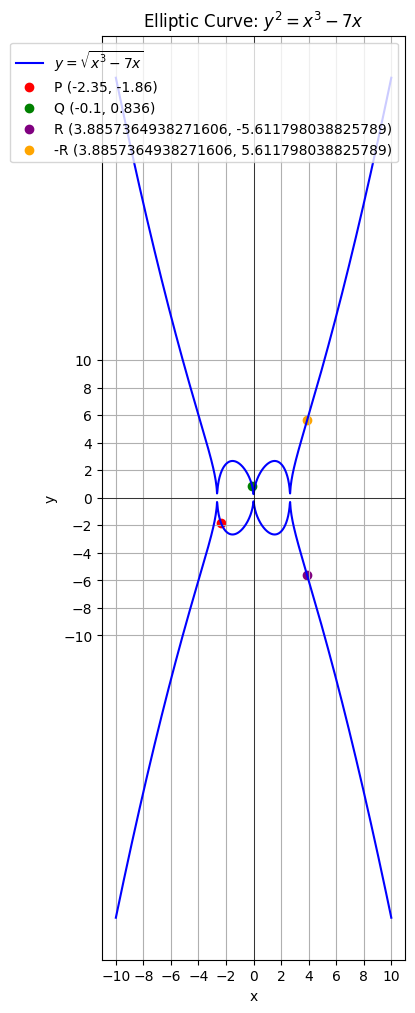

In [57]:
# The functions for calculating m, xr, and yr based on points P and Q, and then plotting the elliptic curve with these points
import numpy as np
import matplotlib.pyplot as plt

# Define the elliptic curve equation: y^2 = x^3 - 7x
def equation_elliptic_1(x):
    return x**3 - 7*x

# Function to calculate and check if the equation holds
def calculate_equation_bool(equation, point):
    xr, yr = point
    return yr**2 == equation(xr)

# Function to calculate slope (m) between two points on the curve
def calculate_m(P, Q):
    x1, y1 = P
    x2, y2 = Q
    if x1 != x2:
        return (y2 - y1) / (x2 - x1)
    else:
        return None  # Handle case where P and Q are the same point

# Function to calculate xr
def calculate_xr(m, P, Q):
    x1, y1 = P
    x2, y2 = Q
    return m**2 - x1 - x2

# Function to calculate yr
def calculate_yr(m, P, Q):
    x1, y1 = P
    xr = calculate_xr(m, P, Q)
    return m * (x1 - xr) - y1

# Define the points P and Q
P = (-2.35, -1.86)
Q = (-0.1, 0.836)

# Calculate m, xr, yr, and the point R
m = calculate_m(P, Q)
xr = calculate_xr(m, P, Q)
yr = calculate_yr(m, P, Q)
R = (xr, yr)

# Check if R satisfies the elliptic curve equation
result = calculate_equation_bool(equation_elliptic_1, R)
print(f"Does the equation hold for R: {result}")
print(f"R: {R}")

# Generate a set of x values for plotting the elliptic curve
x_vals = np.linspace(-10, 10, 1000)

# Calculate the corresponding y values
y_vals = np.sqrt(np.abs(equation_elliptic_1(x_vals)))  # y^2 = f(x) -> y = sqrt(f(x))

# Plot the elliptic curve and the points P, Q, R, and -R
plt.figure(figsize=(12, 12))
plt.plot(x_vals, y_vals, label=r'$y = \sqrt{x^3 - 7x}$', color='blue')  # upper half of the curve
plt.plot(x_vals, -y_vals, color='blue')  # lower half of the curve

# Plot the points P, Q, R, and -R
plt.scatter(*P, color='red', label=f'P {P}')
plt.scatter(*Q, color='green', label=f'Q {Q}')
plt.scatter(*R, color='purple', label=f'R {R}')
plt.scatter(R[0], -R[1], color='orange', label=f'-R ({R[0]}, {-R[1]})')

# Set equal aspect ratio to ensure x and y scales are the same
plt.gca().set_aspect('equal', adjustable='box')

# Add labels, title, and grid
plt.title("Elliptic Curve: $y^2 = x^3 - 7x$")
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.xticks(np.arange(-10, 11, 2))
plt.yticks(np.arange(-10, 11, 2))

plt.grid(True)
plt.legend()

# Show the plot
plt.show()

Does the equation hold for R: False
R: (3.8857364938271606, -5.611798038825789)


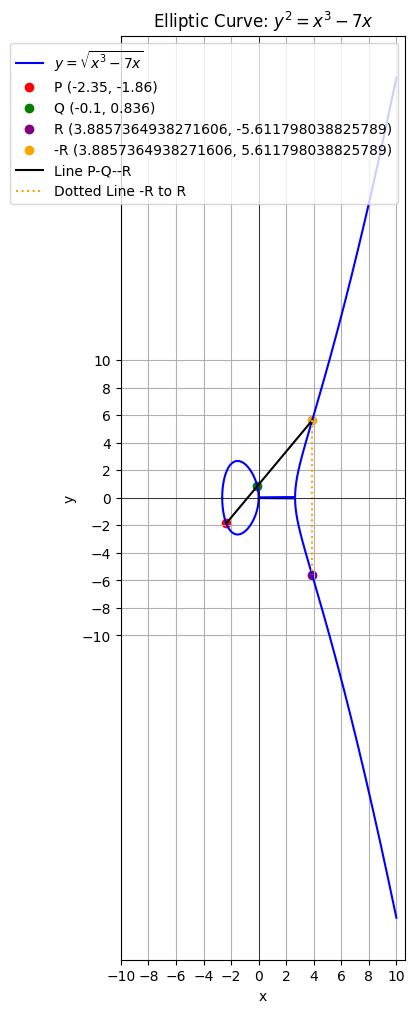

In [72]:
# The functions for calculating m, xr, and yr based on points P and Q, and then plotting the elliptic curve with these points
import numpy as np
import matplotlib.pyplot as plt

# Define the elliptic curve equation: y^2 = x^3 - 7x
def equation_elliptic_1(x):
    return x**3 - 7*x

# Function to calculate and check if the equation holds
def calculate_equation_bool(equation, point):
    xr, yr = point
    return yr**2 == equation(xr)

# Function to calculate slope (m) between two points on the curve
def calculate_m(P, Q):
    x1, y1 = P
    x2, y2 = Q
    if x1 != x2:
        return (y2 - y1) / (x2 - x1)
    else:
        return None  # Handle case where P and Q are the same point

# Function to calculate xr
def calculate_xr(m, P, Q):
    x1, y1 = P
    x2, y2 = Q
    return m**2 - x1 - x2

# Function to calculate yr
def calculate_yr(m, P, Q):
    x1, y1 = P
    xr = calculate_xr(m, P, Q)
    return m * (x1 - xr) - y1

# Define the points P and Q
P = (-2.35, -1.86)
Q = (-0.1, 0.836)

# Calculate m, xr, yr, and the point R
m = calculate_m(P, Q)
xr = calculate_xr(m, P, Q)
yr = calculate_yr(m, P, Q)
R = (xr, yr)

# Check if R satisfies the elliptic curve equation
result = calculate_equation_bool(equation_elliptic_1, R)
print(f"Does the equation hold for R: {result}")
print(f"R: {R}")

# Generate a set of x values for plotting the elliptic curve
x = np.linspace(-10, 10, 100000)

# Calculate the corresponding y values
y_squared = equation_elliptic_1(x)

# Mask values where y^2 is negative, as sqrt can't be applied to negative numbers in real numbers
valid_mask = y_squared >= 0
y_squared_valid = y_squared[valid_mask]
x_valid = x[valid_mask]

# Calculate y values (positive and negative branches) from valid y^2 values
y_positive = np.sqrt(y_squared_valid)
y_negative = -np.sqrt(y_squared_valid)

# Adjusting the plot to include lines from P to Q to -R, and a dotted line from -R to R
plt.figure(figsize=(12, 12))

# Plot the elliptic curve
plt.plot(x_valid, y_positive, label=r'$y = \sqrt{x^3 - 7x}$', color='blue')  # upper half of the curve
plt.plot(x_valid, y_negative, color='blue')  # lower half of the curve

# Plot the points P, Q, R, and -R
plt.scatter(*P, color='red', label=f'P {P}')
plt.scatter(*Q, color='green', label=f'Q {Q}')
plt.scatter(*R, color='purple', label=f'R {R}')
plt.scatter(R[0], -R[1], color='orange', label=f'-R ({R[0]}, {-R[1]})')

# Draw a line from P to Q to -R
plt.plot([P[0], Q[0], R[0]], [P[1], Q[1], -R[1]], color='black', label='Line P-Q--R')

# Draw a dotted line from -R to R
plt.plot([R[0], R[0]], [-R[1], R[1]], linestyle='dotted', color='orange', label='Dotted Line -R to R')

# Set equal aspect ratio to ensure x and y scales are the same
plt.gca().set_aspect('equal', adjustable='box')

# Add labels, title, and grid
plt.title("Elliptic Curve: $y^2 = x^3 - 7x$")
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.xticks(np.arange(-10, 11, 2))
plt.yticks(np.arange(-10, 11, 2))

plt.grid(True)
plt.legend()

# Show the plot
plt.show()
